StartUp with  Keras, Deep Learning, and Python

In [1]:
#the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

from tqdm.notebook import tqdm

In [2]:
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(r'animals')))
random.seed(42)
random.shuffle(imagePaths)

In [3]:
pbar = tqdm(total=len(imagePaths), desc="importing..")
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32,32)).flatten()
    data.append(image)
    
    label = imagePath.split(os.path.sep)[-2] #get folder name
    labels.append(label)
    pbar.update(1)
pbar.close()

importing..:   0%|          | 0/6003 [00:00<?, ?it/s]

In [4]:
print("label Size ", len(labels))
print("data length ", len(data))
print(labels[0])

label Size  6003
data length  6003
dogs


In [5]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.20, random_state=42)

In [7]:
#convert the labels from integers to vectors (for 2-class, binary classification

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [8]:
#[1, 0, 0] # corresponds to cats
#[0, 1, 0] # corresponds to dogs
#[0, 0, 1] # corresponds to panda

# define the 3072-1024-512-3 architecture using Keras
model = Sequential()
#(hiddenLayer, , )
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))#32x32x3=3072
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [9]:
INIT_LR = 0.01
EPOCHS = 20 # use >70 to get better result

opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


In [10]:
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=32)

Epoch 1/20
151/151 [==============================] - 4s 21ms/step - loss: 1.1593 - accuracy: 0.3396 - val_loss: 1.1253 - val_accuracy: 0.4904
Epoch 2/20
151/151 [==============================] - 2s 15ms/step - loss: 1.0735 - accuracy: 0.4279 - val_loss: 1.0950 - val_accuracy: 0.3314
Epoch 3/20
151/151 [==============================] - 2s 16ms/step - loss: 1.0363 - accuracy: 0.4771 - val_loss: 1.0508 - val_accuracy: 0.4080
Epoch 4/20
151/151 [==============================] - 2s 16ms/step - loss: 1.0082 - accuracy: 0.4808 - val_loss: 1.0549 - val_accuracy: 0.5046
Epoch 5/20
151/151 [==============================] - 2s 15ms/step - loss: 0.9776 - accuracy: 0.5189 - val_loss: 1.3860 - val_accuracy: 0.3339
Epoch 6/20
151/151 [==============================] - 2s 15ms/step - loss: 0.9671 - accuracy: 0.5126 - val_loss: 1.0027 - val_accuracy: 0.5029
Epoch 7/20
151/151 [==============================] - 2s 15ms/step - loss: 0.9317 - accuracy: 0.5335 - val_loss: 0.9479 - val_accuracy: 0.5196

In [11]:
print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

        cats       1.00      0.00      0.01       396
        dogs       0.42      0.85      0.57       398
      images       0.00      0.00      0.00         2
       panda       0.75      0.74      0.75       405

    accuracy                           0.53      1201
   macro avg       0.54      0.40      0.33      1201
weighted avg       0.72      0.53      0.44      1201



I:\ML_Install\anaconda\envs\ObejctDetection\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
I:\ML_Install\anaconda\envs\ObejctDetection\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
I:\ML_Install\anaconda\envs\ObejctDetection\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

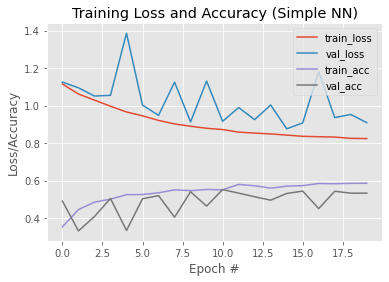

In [18]:

# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(r"trainOutput/scores_simpleTest.png")

In [19]:
print("[INFO] serializing network and label binarizer...")
model.save(r'trainOutput/smallvggnet.model', save_format="h5")
f = open(r'trainOutput/simplevggnet_lb.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()
print("[INFO] Done 👏")

[INFO] serializing network and label binarizer...
[INFO] Done 👏
